### Sentiment Analysis Related To The Increasing Amount of Indonesian VAT (PPN) to 12%.

This file has a different approach by using a binary classification for the sentiments (positive and negative)

In [ ]:
#%pip install imbalanced-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

#### 1. Data Splitting

In [2]:
headlines_binary = pd.read_csv(r'data\headlines_binary.csv')
headlines_binary

,Unnamed: 0,no,url,title,platform,title_en,score,label
0,0,0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...,0.000000,1
1,1,1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed,0.000000,1
2,2,2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!,0.000000,1
3,3,3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...,0.000000,1
4,4,4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...,0.000000,1
...,...,...,...,...,...,...,...,...
409,409,409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ...",0.066667,1
410,410,410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...,0.000000,1
411,411,411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!",0.125000,1
412,412,412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...,0.000000,1


In [3]:
headlines_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  414 non-null    int64  
 1   no          414 non-null    int64  
 2   url         414 non-null    object 
 3   title       414 non-null    object 
 4   platform    414 non-null    object 
 5   title_en    414 non-null    object 
 6   score       414 non-null    float64
 7   label       414 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 26.0+ KB


In [4]:
#dropped unnamed and no columns
headlines_binary = headlines_binary.drop(['Unnamed: 0', 'no'], axis=1)
headlines_binary

,url,title,platform,title_en,score,label
0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...,0.000000,1
1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed,0.000000,1
2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!,0.000000,1
3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...,0.000000,1
4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...,0.000000,1
...,...,...,...,...,...,...
409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ...",0.066667,1
410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...,0.000000,1
411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!",0.125000,1
412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...,0.000000,1


Splitting the data into:
- 80% train
- 20% test

In [5]:
from sklearn.model_selection import train_test_split

#input
X = headlines_binary['title_en']
#output
y = headlines_binary['label']

#train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

#check the size
print("Train size:", len(X_train))
print("Test size:", len(X_test))

#sanity check (414 rows)
print(f'Total Size: {len(X_train) + len(X_test)}')

Train size: 331
Test size: 83
Total Size: 414


#### 2. EDA

##### a. Checking Data Structure

In [6]:
print(X_train.head())
print('')
print(X_train.info())
print('')
print(X_train.describe())

93     Do you have plans to buy a house when VAT rise...
266    Need Rp. 700 T to fill the deficit, the VAT in...
155    Buying a house can get a discount or tax free,...
232    VAT will increase, what about the price of the...
197    Complete rules regarding building your own hou...
Name: title_en, dtype: object

<class 'pandas.core.series.Series'>
Index: 331 entries, 93 to 62
Series name: title_en
Non-Null Count  Dtype 
--------------  ----- 
331 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB
None

count                                                   331
unique                                                  330
top       Not included in Prabowo's APBN posture, will V...
freq                                                      2
Name: title_en, dtype: object


##### b. Checking for Null and Missing Values

In [7]:
print(f'Null Values: {X_train.isnull().sum()}')
print(f'Missing Values: {(X_train == '').sum()}')

Null Values: 0
Missing Values: 0


##### c. Checking for Duplicated Values

In [8]:
print(f'Duplicated Values: {X_train.duplicated().sum()}')

Duplicated Values: 1


##### d. Words Distribution

<Axes: xlabel='title_en', ylabel='Count'>

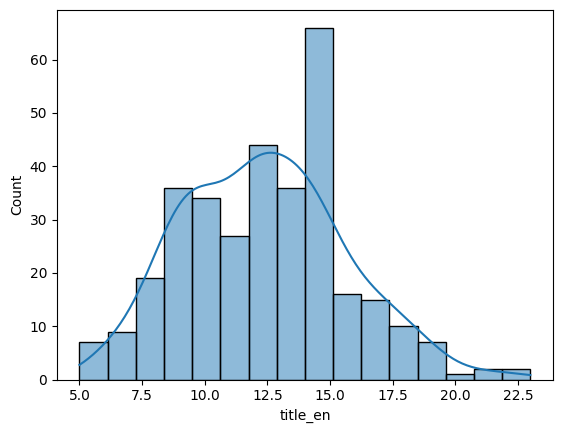

In [9]:
num_words = X_train.apply(lambda n: len(n.split()))

sns.histplot(num_words, kde=True)

Overall distribution are roughly normal (bell-shaped) with:
- Most titles having between 10-17 words
- Approximately 60 titles have around 15 words (which is the highest amount)
- Few titles with very short (< 8 words) or very long (> 20 words) lengths

##### e. Wordcloud Visualization

In [10]:
text = " ".join(title_en for title_en in X_train) #combined all the text into one and give a space between strings
print("There are {} words in the combination of all titles.".format(len(text))) 

There are 23994 words in the combination of all titles.


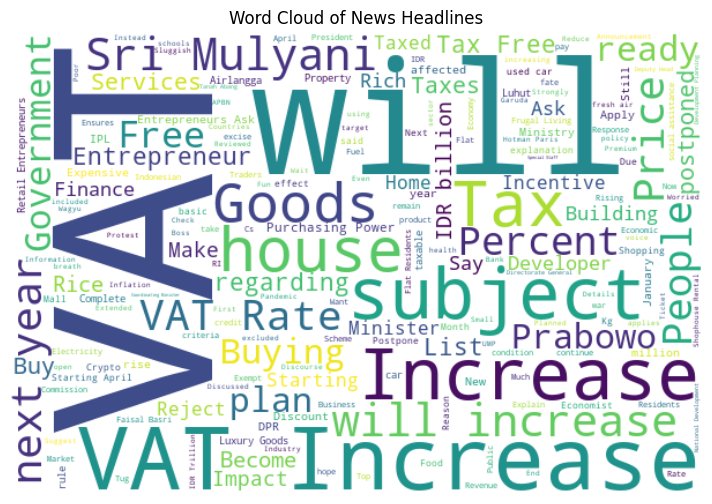

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text) 

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

##### f. Sentiment Class Distribution

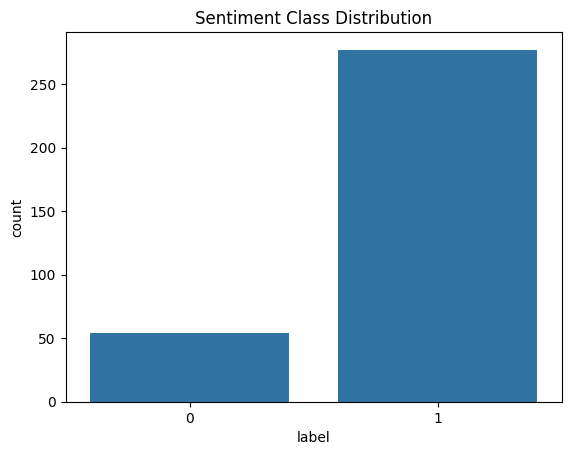

In [12]:
sns.countplot(x = y_train)
plt.title('Sentiment Class Distribution')
plt.show()

O for negative, 1 for positive

Noticed that there are a lot of imbalances in the data, we need to balance it somehow

#### 3. Data Preprocessing

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

##### a. Case Folding

In [13]:
X_train = X_train.apply(lambda x: x.lower())
X_train

93     do you have plans to buy a house when vat rise...
266    need rp. 700 t to fill the deficit, the vat in...
155    buying a house can get a discount or tax free,...
232    vat will increase, what about the price of the...
197    complete rules regarding building your own hou...
                             ...                        
377    12% vat makes people's purchasing power drop e...
64     instead of increasing vat to 12%, economists s...
392           vat increase to 12% can reduce debt burden
65     if vat increases to 12% in 2025, people will s...
62     prabowo's determination to build 3 million hou...
Name: title_en, Length: 331, dtype: object

##### b. Removing Characters

In [14]:
import re

def remove_chars(text):
    # remove . and ,
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

X_train = X_train.apply(lambda x: remove_chars(x))
X_train

93     do you have plans to buy a house when vat rise...
266    need rp  t to fill the deficit the vat increas...
155    buying a house can get a discount or tax free ...
232    vat will increase what about the price of the ...
197    complete rules regarding building your own hou...
                             ...                        
377     vat makes peoples purchasing power drop even ...
64     instead of increasing vat to  economists sugge...
392              vat increase to  can reduce debt burden
65           if vat increases to  in  people will suffer
62     prabowos determination to build  million house...
Name: title_en, Length: 331, dtype: object

##### c. Tokenization

In [15]:
from nltk.tokenize import word_tokenize

tokenized_title = X_train.apply(lambda x: word_tokenize(x))
print(tokenized_title)

93     [do, you, have, plans, to, buy, a, house, when...
266    [need, rp, t, to, fill, the, deficit, the, vat...
155    [buying, a, house, can, get, a, discount, or, ...
232    [vat, will, increase, what, about, the, price,...
197    [complete, rules, regarding, building, your, o...
                             ...                        
377    [vat, makes, peoples, purchasing, power, drop,...
64     [instead, of, increasing, vat, to, economists,...
392       [vat, increase, to, can, reduce, debt, burden]
65     [if, vat, increases, to, in, people, will, suf...
62     [prabowos, determination, to, build, million, ...
Name: title_en, Length: 331, dtype: object


##### d. Stopword Removals

In [16]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
filtered_tokens = tokenized_title.apply(lambda x: [token for token in x if token not in stop_words])

print(filtered_tokens)

93     [plans, buy, house, vat, rises, continue, post...
266    [need, rp, fill, deficit, vat, increase, wrong...
155    [buying, house, get, discount, tax, free, cond...
232         [vat, increase, price, poco, pro, cellphone]
197    [complete, rules, regarding, building, house, ...
                             ...                        
377    [vat, makes, peoples, purchasing, power, drop,...
64     [instead, increasing, vat, economists, suggest...
392                [vat, increase, reduce, debt, burden]
65                      [vat, increases, people, suffer]
62     [prabowos, determination, build, million, hous...
Name: title_en, Length: 331, dtype: object


In [17]:
X_train = filtered_tokens
X_train

93     [plans, buy, house, vat, rises, continue, post...
266    [need, rp, fill, deficit, vat, increase, wrong...
155    [buying, house, get, discount, tax, free, cond...
232         [vat, increase, price, poco, pro, cellphone]
197    [complete, rules, regarding, building, house, ...
                             ...                        
377    [vat, makes, peoples, purchasing, power, drop,...
64     [instead, increasing, vat, economists, suggest...
392                [vat, increase, reduce, debt, burden]
65                      [vat, increases, people, suffer]
62     [prabowos, determination, build, million, hous...
Name: title_en, Length: 331, dtype: object

In [18]:
#backup variable
X_train2 = X_train
X_train2

93     [plans, buy, house, vat, rises, continue, post...
266    [need, rp, fill, deficit, vat, increase, wrong...
155    [buying, house, get, discount, tax, free, cond...
232         [vat, increase, price, poco, pro, cellphone]
197    [complete, rules, regarding, building, house, ...
                             ...                        
377    [vat, makes, peoples, purchasing, power, drop,...
64     [instead, increasing, vat, economists, suggest...
392                [vat, increase, reduce, debt, burden]
65                      [vat, increases, people, suffer]
62     [prabowos, determination, build, million, hous...
Name: title_en, Length: 331, dtype: object

##### e. Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    # join_lemmatized = ''.join(lemmatize_words)
    return lemmatized_words

X_lem = X_train.apply(lemmatize_text)
print(X_lem)

93     [plan, buy, house, vat, rise, continue, postpone]
266    [need, rp, fill, deficit, vat, increase, wrong...
155    [buying, house, get, discount, tax, free, cond...
232         [vat, increase, price, poco, pro, cellphone]
197    [complete, rule, regarding, building, house, s...
                             ...                        
377    [vat, make, people, purchasing, power, drop, e...
64     [instead, increasing, vat, economist, suggest,...
392                [vat, increase, reduce, debt, burden]
65                       [vat, increase, people, suffer]
62     [prabowos, determination, build, million, hous...
Name: title_en, Length: 331, dtype: object


#### 4. Vectorization

TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

#convert to strings
X_train_str = X_train.apply(lambda x: ' '.join(x))
X_test_str = X_test.apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train_tfidf = vectorizer.fit_transform(X_train_str)
X_test_tfidf = vectorizer.transform(X_test_str) #test data

#### 5. Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

#### 6. Classification Balancing

Using SMOTE

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [22]:
from imblearn.over_sampling import RandomOverSampler

#convert to dense first 
# smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_tfidf, y_train)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

In [23]:
#check class distribution
from collections import Counter
print("Original distribution:", Counter(y_train))
print("After balancing:", Counter(y_train_resampled))

Original distribution: Counter({1: 277, 0: 54})
After balancing: Counter({1: 277, 0: 277})


<Axes: xlabel='label', ylabel='count'>

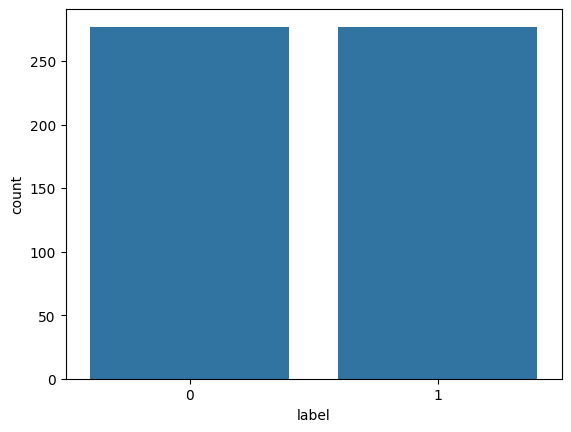

In [24]:
sns.countplot(x=y_train_resampled)

#### 7. Training and Testing

##### a. Training

First let's train the data and predict with the train data to see the baseline accuracy for each models

In [25]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_data_train = KNeighborsClassifier(n_neighbors=5)
knn_data_train.fit(X_train_resampled, y_train_resampled)

#model prediction with knn
y_train_knn = knn_data_train.predict(X_train_resampled)

In [26]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
clf_data_train = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, class_weight='balanced')
clf_data_train = clf_data_train.fit(X_train_resampled, y_train_resampled)

y_train_clf = clf_data_train.predict(X_train_resampled)

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg_data_train = LogisticRegression(C=1.0, max_iter=1000, class_weight='balanced')
logreg_data_train = logreg_data_train.fit(X_train_resampled, y_train_resampled)

y_train_logreg = logreg_data_train.predict(X_train_resampled)

In [28]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB

X_train_resampled_arr = X_train_resampled.toarray()

gnb_data_train = GaussianNB()
gnb_data_train = gnb_data_train.fit(X_train_resampled_arr, y_train_resampled)
y_train_gnb = gnb_data_train.predict(X_train_resampled_arr)

In [29]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rdf_data_train = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced')
rdf_data_train = rdf_data_train.fit(X_train_resampled, y_train_resampled)

y_train_rdf = rdf_data_train.predict(X_train_resampled)

In [77]:
from sklearn import svm

svm_data_train = svm.SVC(kernel='rbf', class_weight='balanced')
svm_data_train.fit(X_train_resampled, y_train_resampled)

y_train_svm = svm_data_train.predict(X_train_resampled)

In [78]:
#baseline accuracy
from sklearn.metrics import accuracy_score

print('Baseline Model accuracy with KNN:', accuracy_score(y_train_resampled, y_train_knn)*100)
print('Baseline Model accuracy with Decision Tree:', accuracy_score(y_train_resampled, y_train_clf)*100)
print('Baseline Model accuracy with Logistic Regression:', accuracy_score(y_train_resampled, y_train_logreg)*100)
print('Baseline Model accuracy with Naive Bayes Classifier:', accuracy_score(y_train_resampled, y_train_gnb)*100)
print('Baseline Model accuracy with Random Forest Classifier:', accuracy_score(y_train_resampled, y_train_rdf)*100)
print('Baseline Model accuracy with SVM:', accuracy_score(y_train_resampled, y_train_svm)*100)

Baseline Model accuracy with KNN: 97.47292418772562
Baseline Model accuracy with Decision Tree: 89.71119133574007
Baseline Model accuracy with Logistic Regression: 100.0
Baseline Model accuracy with Naive Bayes Classifier: 99.45848375451264
Baseline Model accuracy with Random Forest Classifier: 98.37545126353791
Baseline Model accuracy with SVM: 100.0


##### b. Testing

In [32]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

#model prediction with knn
y_pred_knn = knn.predict(X_test_tfidf)

In [33]:
#decision tree
clf = DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42, class_weight='balanced')
clf = clf.fit(X_train_resampled, y_train_resampled)
y_pred_clf = clf.predict(X_test_tfidf)

In [34]:
#logistic regression
logreg = LogisticRegression(C=1.0, max_iter=1000, class_weight='balanced')
logreg = logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_tfidf)

In [35]:
#naive bayes classifier
X_test_tfidf_arr = X_test_tfidf.toarray()

gnb = GaussianNB()
gnb.fit(X_train_resampled_arr, y_train_resampled)
y_pred_gnb = gnb.predict(X_test_tfidf_arr)

In [36]:
#random forest classifier
rdf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced')
rdf.fit(X_train_resampled, y_train_resampled)
y_pred_rdf = rdf.predict(X_test_tfidf)

In [75]:
# svm
svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test_tfidf)

In [76]:
#prediction score
from sklearn.metrics import accuracy_score

print('Model accuracy with KNN:', accuracy_score(y_test, y_pred_knn)*100)
print('Model accuracy with Decision Tree:', accuracy_score(y_test, y_pred_clf)*100)
print('Model accuracy with Logistic Regression:', accuracy_score(y_test, y_pred_logreg)*100)
print('Model accuracy with Naive Bayes Classifier:', accuracy_score(y_test, y_pred_gnb)*100)
print('Model accuracy with Random Forest Classifier:', accuracy_score(y_test, y_pred_rdf)*100)
print('Model accuracy with SVM:', accuracy_score(y_test, y_pred_svm)*100)

Model accuracy with KNN: 83.13253012048193
Model accuracy with Decision Tree: 83.13253012048193
Model accuracy with Logistic Regression: 83.13253012048193
Model accuracy with Naive Bayes Classifier: 16.867469879518072
Model accuracy with Random Forest Classifier: 83.13253012048193
Model accuracy with SVM: 83.13253012048193


The model is overfitting.

#### 8. Model Tuning

##### a. Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
def cv_score(algo, train_x, train_y, cv=5):
    scores = cross_val_score(algo, train_x, train_y, cv=cv)
    print('CV Scores: ', scores)
    print('Mean Accuracy', scores.mean())

- KNN

In [67]:
print('KNN CV (Train) Score:')
knn_train_cv = cv_score(knn, X_train_resampled, y_train_resampled, cv=5)
print('')

print('KNN CV (Test) Score:')
knn_train_cv = cv_score(knn, X_test_tfidf, y_test, cv=5)

KNN CV (Train) Score:
CV Scores:  [0.85585586 0.92792793 0.88288288 0.87387387 0.92727273]
Mean Accuracy 0.8935626535626536

KNN CV (Test) Score:
CV Scores:  [0.82352941 0.82352941 0.82352941 0.875      0.8125    ]
Mean Accuracy 0.8316176470588236


- Decision Tree

In [63]:
print('Decision Tree CV (Train) Score:')
clf_train_cv = cv_score(clf, X_train_resampled, y_train_resampled, cv=5)
print('')

print('Decision Tree CV (Test) Score:')
clf_train_cv = cv_score(clf, X_test_tfidf, y_test, cv=5)

Decision Tree CV (Train) Score:
CV Scores:  [0.87387387 0.84684685 0.81981982 0.79279279 0.85454545]
Mean Accuracy 0.8375757575757575

Decision Tree CV (Test) Score:
CV Scores:  [0.82352941 0.82352941 0.82352941 0.125      0.1875    ]
Mean Accuracy 0.5566176470588236


- Logistic Regression

In [68]:
print('Logistic Regression CV (Train) Score:')
logreg_train_cv = cv_score(logreg, X_train_resampled, y_train_resampled, cv=5)
print('')

print('Logistic Regression CV (Test) Score:')
logreg_train_cv = cv_score(logreg, X_test_tfidf, y_test, cv=5)

Logistic Regression CV (Train) Score:
CV Scores:  [0.99099099 0.99099099 0.99099099 0.98198198 1.        ]
Mean Accuracy 0.990990990990991

Logistic Regression CV (Test) Score:
CV Scores:  [0.17647059 0.17647059 0.17647059 0.125      0.1875    ]
Mean Accuracy 0.16838235294117648


- Naive Bayes

In [70]:
print('Naive Bayes CV (Train) Score:')
gnb_train_cv = cv_score(gnb, X_train_resampled_arr, y_train_resampled, cv=5)
print('')

print('Naive Bayes CV (Test) Score:')
gnb_train_cv = cv_score(gnb, X_test_tfidf_arr, y_test, cv=5)

Naive Bayes CV (Train) Score:
CV Scores:  [0.88288288 0.92792793 0.91891892 0.90990991 0.90909091]
Mean Accuracy 0.9097461097461098

Naive Bayes CV (Test) Score:
CV Scores:  [0.17647059 0.17647059 0.17647059 0.125      0.1875    ]
Mean Accuracy 0.16838235294117648


e:\Pacmann Final Project - Intro to ML\.venv\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Pacmann Final Project - Intro to ML\.venv\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Pacmann Final Project - Intro to ML\.venv\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Pacmann Final Project - Intro to ML\.venv\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Pacmann Final Project - Intro to ML\.venv\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0

- Random Forest

In [71]:
print('Random Forest CV (Train) Score:')
rdf_train_cv = cv_score(rdf, X_train_resampled, y_train_resampled, cv=5)
print('')

print('Random Forest CV (Test) Score:')
rdf_train_cv = cv_score(rdf, X_test_tfidf, y_test, cv=5)

Random Forest CV (Train) Score:
CV Scores:  [0.92792793 0.94594595 0.95495495 0.9009009  0.93636364]
Mean Accuracy 0.9332186732186732

Random Forest CV (Test) Score:
CV Scores:  [0.17647059 0.82352941 0.82352941 0.875      0.1875    ]
Mean Accuracy 0.5772058823529411


- SVM

In [72]:
print('SVM CV (Train) Score:')
svm_train_cv = cv_score(svm_data_train, X_train_resampled, y_train_resampled, cv=5)
print('')

print('SVM CV (Test) Score:')
svm_train_cv = cv_score(svm_classifier, X_test_tfidf, y_test, cv=5)

SVM CV (Train) Score:
CV Scores:  [0.99099099 0.99099099 0.98198198 0.98198198 1.        ]
Mean Accuracy 0.9891891891891891

SVM CV (Test) Score:
CV Scores:  [0.82352941 0.82352941 0.82352941 0.875      0.8125    ]
Mean Accuracy 0.8316176470588236


##### b. Re-Balancing

- SMOTE

In [79]:
from imblearn.over_sampling import SMOTE

#convert to dense first 
smote = SMOTE(random_state=42)
# ros = RandomOverSampler(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_scaled, y_train)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

##### c. Regularization

https://www.dataquest.io/blog/regularization-in-machine-learning/

- L1 (ridge regression)

In [82]:
from sklearn.linear_model import Ridge

# def ridge_regularization(alpha, train_x, train_y):
#     ridge = Ridge(alpha=alpha).fit(train_x, train_y)
#     return ridge

# knn_ridge_train = ridge_regularization(0.7, X_train_resampled, y_train_resampled)

- L2 (lasso regression)

In [ ]:
from sklearn.linear_model import Lasso

##### d. Re-Train and Re-Test ML Models

#### 9. Model Evaluation

Using confusion matrix

In [40]:
# from sklearn.metrics import confusion_matrix, classification_report
# y_pred_rdf = clf.predict(X_test_tfidf)
# print(confusion_matrix(y_test, y_pred_rdf))
# print(classification_report(y_test, y_pred_rdf))

In [41]:
# y_pred_knn = knn.predict(X_test_tfidf)
# print(confusion_matrix(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))